# **Optimización del Diagnóstico de Diabetes**

**Integrantes:** Diego Guerrero, Brayan Sánchez, Dana Villamizar

## **Introducción**

La diabetes es una enfermedad crónica que afecta a millones de personas en todo el mundo y cuya prevalencia continúa en aumento. Esta condición puede generar complicaciones graves si no se detecta y trata a tiempo, por lo que un diagnóstico temprano y preciso resulta fundamental para mejorar la calidad de vida de los pacientes y reducir la carga sobre los sistemas de salud. En este contexto, la inteligencia artificial (IA), y en particular el aprendizaje automático (machine learning), ofrece herramientas prometedoras para apoyar la toma de decisiones clínicas mediante modelos predictivos basados en datos. Este proyecto propone el desarrollo de un sistema automatizado para la predicción de diabetes, haciendo uso de modelos de machine learning, con el fin de optimizar la selección de características y mejorar el desempeño del diagnóstico.

## **Motivación**

El diagnóstico tradicional de la diabetes se basa en umbrales clínicos fijos, lo que puede limitar su precisión en casos complejos. Con el aumento de datos médicos disponibles, se presenta la oportunidad de aplicar técnicas de inteligencia artificial para mejorar la detección y el análisis de esta enfermedad.

Este proyecto busca aprovechar modelos de aprendizaje automático supervisado y no supervisado para identificar patrones relevantes, optimizar la selección de variables y explorar agrupaciones naturales en los datos, con el fin de aportar herramientas que fortalezcan el diagnóstico clínico y la comprensión de la diabetes.



## **Objetivos**

### Objetivo general:
Desarrollar un sistema de apoyo al diagnóstico de diabetes mediante la aplicación de técnicas de aprendizaje automático supervisado y no supervisado, que permita optimizar la selección de características, identificar patrones en los datos clínicos y mejorar la precisión en la detección de casos.

### Objetivos específicos:

* Aplicar técnicas de preprocesamiento y análisis exploratorio para comprender la distribución y correlación de las variables presentes en el dataset clínico.

* Implementar modelos de clasificación supervisada para predecir la presencia de diabetes, evaluando su desempeño con métricas como precisión, recall y F1-score.

* Aplicar algoritmos de reducción de dimensionalidad como PCA y t-SNE para facilitar la visualización y exploración de estructuras en los datos.

* Utilizar métodos de clustering no supervisado como K-Means y DBSCAN para identificar posibles agrupaciones de pacientes con características clínicas similares, y compararlas con los diagnósticos reales.

## **Información del dataset**

Obtenido de Kaggle.

---


Contiene 768 datos

### **LIBRERIAS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random

### **SUBIR AL DRIVE**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SISTEMAS🧠/7mo semestre🎢/INTELIGENCIA ARTIFICIAL I/PROYECTO/diabetes.csv")
#df = pd.read_csv("/content/drive/MyDrive/Séptimo semestre/Inteligencia Artificial I/diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Mostrar estructura general
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## **PREPROCESAMIENTO**

### **LIMPIEZA DEL DATASET**

In [ ]:
# Reemplazar ceros por NaN en columnas donde 0 no tiene sentido
cols_with_invalid_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# Imputar con mediana
imputer = SimpleImputer(strategy='median')
df[cols_with_invalid_zeros] = imputer.fit_transform(df[cols_with_invalid_zeros])

# Normalizar características numéricas
scaler = MinMaxScaler()
features = df.drop("Outcome", axis=1)
normalized_features = scaler.fit_transform(features)
df_normalized = pd.DataFrame(normalized_features, columns=features.columns)
df_normalized["Outcome"] = df["Outcome"]

### **ANÁLISIS DEL DATASET**

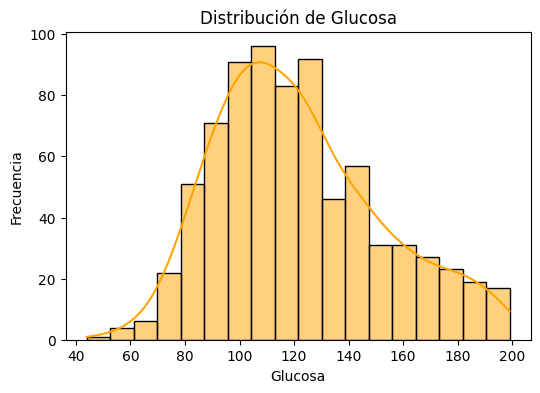

In [ ]:
# 1. Histograma de Glucosa
plt.figure(figsize=(6, 4))
sns.histplot(df['Glucose'], kde=True, color='orange')
plt.title("Distribución de Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")
plt.show()

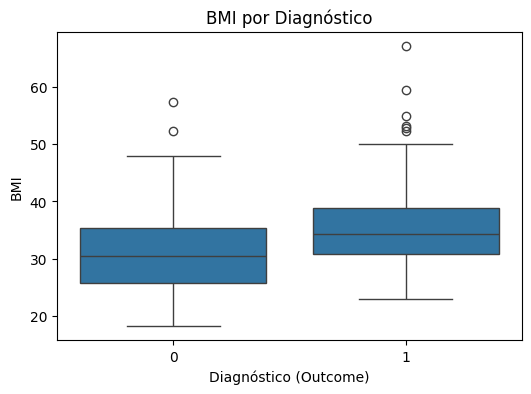

In [ ]:
# 2. Boxplot de BMI según diagnóstico
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI por Diagnóstico")
plt.xlabel("Diagnóstico (Outcome)")
plt.ylabel("BMI")
plt.show()

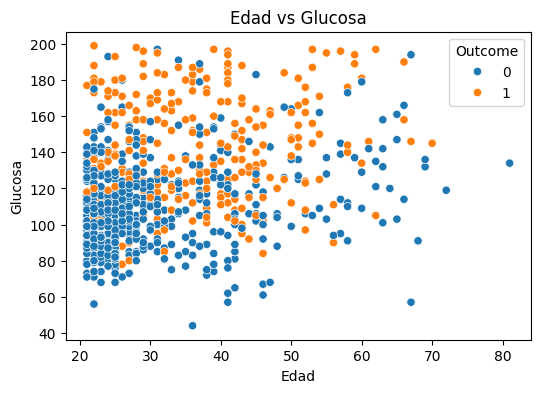

In [ ]:
# 3. Dispersión Edad vs Glucosa por diagnóstico
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title("Edad vs Glucosa")
plt.xlabel("Edad")
plt.ylabel("Glucosa")
plt.show()

<Figure size 600x400 with 0 Axes>

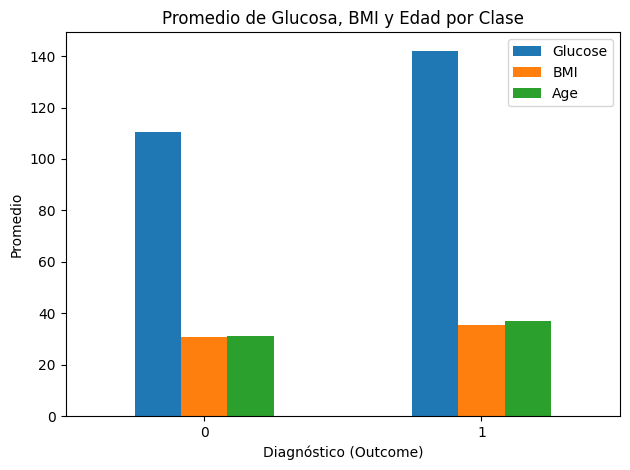

In [ ]:
# 4. Promedios de variables seleccionadas por clase
plt.figure(figsize=(6, 4))
df.groupby('Outcome')[["Glucose", "BMI", "Age"]].mean().plot(kind='bar')
plt.title("Promedio de Glucosa, BMI y Edad por Clase")
plt.xlabel("Diagnóstico (Outcome)")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

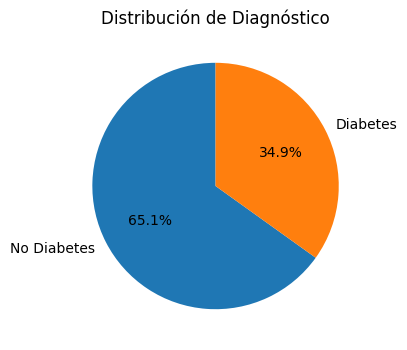

In [ ]:
# 5. Gráfico de torta para el diagnóstico
plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=["No Diabetes", "Diabetes"], startangle=90)
plt.title("Distribución de Diagnóstico")
plt.ylabel("")
plt.show()


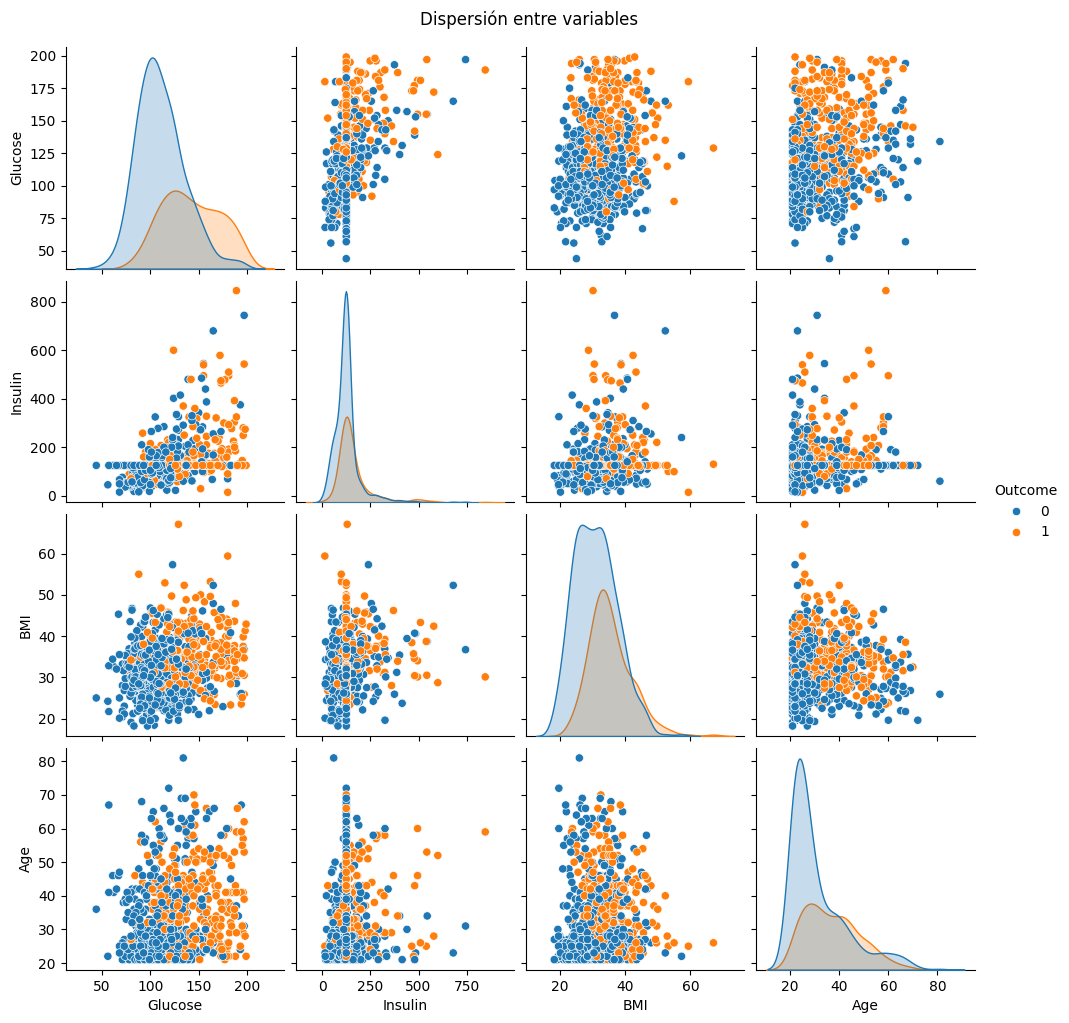

In [ ]:
sns.pairplot(df, hue='Outcome', vars=["Glucose", "Insulin", "BMI", "Age"])
plt.suptitle("Dispersión entre variables", y=1.02)
plt.show()

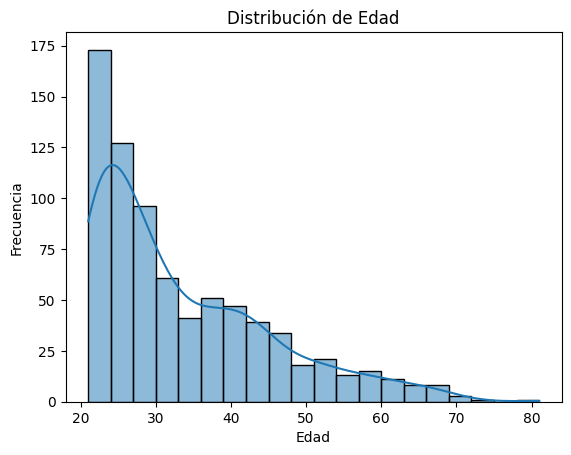

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

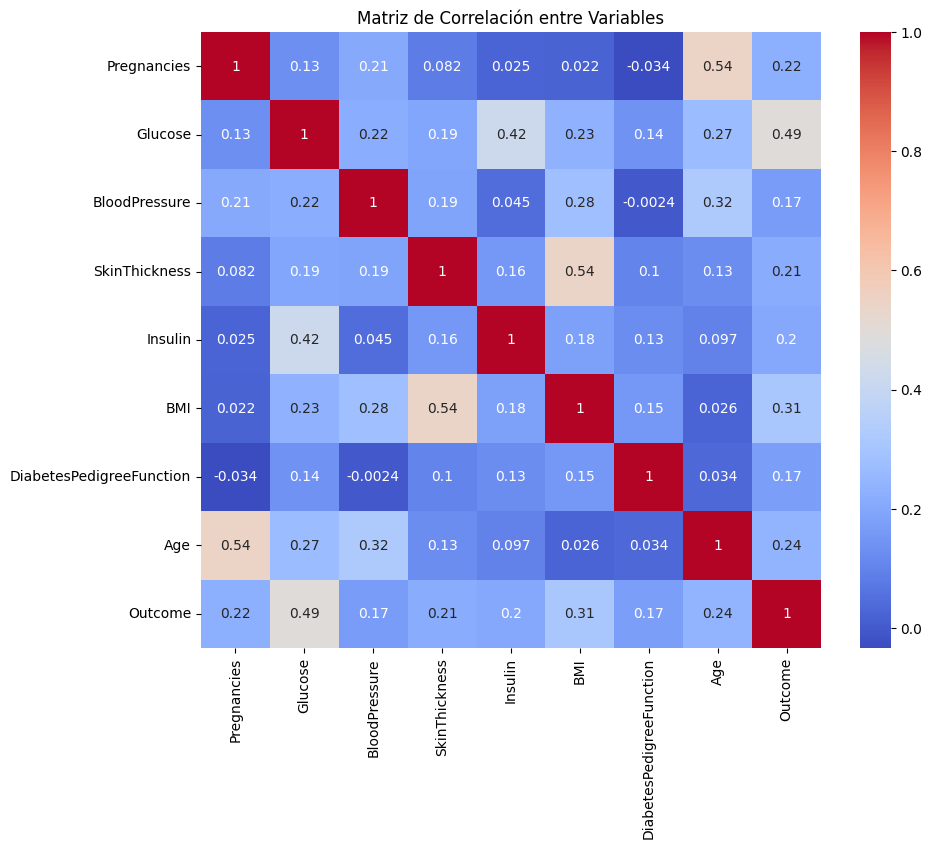

In [ ]:
# 6. Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables")
plt.show()

## **CLASIFICACIÓN SUPERVISADA**

In [ ]:
# Division de la data para los modelos
# Usamos el df_normalized generado antes
X = df_normalized.drop("Outcome", axis=1)
y = df_normalized["Outcome"]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Usar solo las características seleccionadas
X_train_sel = X_train
X_test_sel = X_test

# -------------------------------------------
# Entrenamiento de Modelos
# -------------------------------------------

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_sel, y_train)
y_pred_rf = rf.predict(X_test_sel)
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))

# SVM
svm = SVC()
svm.fit(X_train_sel, y_train)
y_pred_svm = svm.predict(X_test_sel)
print("\nSVM")
print(classification_report(y_test, y_pred_svm))

# Red Neuronal (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
mlp.fit(X_train_sel, y_train)
y_pred_mlp = mlp.predict(X_test_sel)
print("\nRed Neuronal (MLP)")
print(classification_report(y_test, y_pred_mlp))



Random Forest
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231


SVM
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


Red Neuronal (MLP)
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74 

#### **Algoritmo genético para selección de características**

In [ ]:
#individual= [1, 0, 0, 1, 1, 0, 1] - combinacion de columnas del df
def fitness(individual): #Evalúa qué tan buena es la combinación
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return 0
    X_selected = X_train.iloc[:, selected_features]
    model = RandomForestClassifier()
    scores = cross_val_score(model, X_selected, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Inicializar población
def create_population(size, num_features): #matriz, cada fila es un individuo
    return [random.choices([0, 1], k=num_features) for _ in range(size)]

# Selección y cruce
def crossover(parent1, parent2): #Mezclarlas
    point = random.randint(1, len(parent1)-2)
    return parent1[:point] + parent2[point:]

def mutate(individual, mutation_rate=0.1): #cambiarlas randomicamente
    return [bit if random.random() > mutation_rate else 1 - bit for bit in individual]

# GA principal
def genetic_algorithm(X_train, generations=10, pop_size=10):
    num_features = X_train.shape[1]
    population = create_population(pop_size, num_features)
    best_individual = None
    best_score = 0

    for gen in range(generations):
        scores = [fitness(ind) for ind in population]
        ranked = sorted(zip(population, scores), key=lambda x: x[1], reverse=True)

        print(f"Generación {gen+1} - Mejor precisión: {ranked[0][1]:.4f}")
        if ranked[0][1] > best_score:
            best_score = ranked[0][1]
            best_individual = ranked[0][0]

        selected = [ind for ind, score in ranked[:4]]
        population = selected.copy()
        while len(population) < pop_size:
            parent1, parent2 = random.sample(selected, 2)
            child = mutate(crossover(parent1, parent2))
            population.append(child)

    return best_individual, best_score

best_ind, best_score = genetic_algorithm(X_train)

selected_features = [i for i, bit in enumerate(best_ind) if bit == 1]
print(f"\nFeatures seleccionadas (índices): {selected_features}")
print(f"Precisión promedio GA: {best_score:.4f}")

Generación 1 - Mejor precisión: 0.7728
Generación 2 - Mejor precisión: 0.7765
Generación 3 - Mejor precisión: 0.7654
Generación 4 - Mejor precisión: 0.7727
Generación 5 - Mejor precisión: 0.7802
Generación 6 - Mejor precisión: 0.7765
Generación 7 - Mejor precisión: 0.7727
Generación 8 - Mejor precisión: 0.7839
Generación 9 - Mejor precisión: 0.7802
Generación 10 - Mejor precisión: 0.7747

Features seleccionadas (índices): [0, 1, 3, 5, 6, 7]
Precisión promedio GA: 0.7839


In [ ]:
selected = features.columns[selected_features]
print(selected)

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


### MODELOS SUPERVISADOS SIN REDUCCIÓN DE DIMENSIONALIDAD

In [ ]:
# Usar solo las características seleccionadas
X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

# -------------------------------------------
# Entrenamiento de Modelos
# -------------------------------------------

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_sel, y_train)
y_pred_rf = rf.predict(X_test_sel)
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))

# SVM
svm = SVC()
svm.fit(X_train_sel, y_train)
y_pred_svm = svm.predict(X_test_sel)
print("\nSVM")
print(classification_report(y_test, y_pred_svm))

# Red Neuronal (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
mlp.fit(X_train_sel, y_train)
y_pred_mlp = mlp.predict(X_test_sel)
print("\nRed Neuronal (MLP)")
print(classification_report(y_test, y_pred_mlp))



Random Forest
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231


SVM
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


Red Neuronal (MLP)
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75 

## **CLASIFICACIÓN NO SUPERVISADA**

En esta etapa del proyecto, nos proponemos explorar los métodos de clasificación no supervisada (clustering) con el objetivo de identificar grupos de pacientes con características similares, sin usar directamente la etiqueta de diagnóstico (Outcome). Esto permite descubrir patrones ocultos en los datos y evaluar si los grupos encontrados se alinean con la presencia de diabetes


Para facilitar la visualización y mejorar la separación entre grupos, aplicamos técnicas de reducción de dimensionalidad como:

PCA (Análisis de Componentes Principales): para proyectar los datos en un espacio de menor dimensión conservando la mayor varianza posible

t-SNE (t-distributed Stochastic Neighbor Embedding): para explorar la estructura local y visualmente separar posibles agrupaciones


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
from scipy.stats import mode

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

Influencia segun cada caracteristica
-----------------------------------------------
                               PC1       PC2
Pregnancies               0.581428 -0.451642
Glucose                   0.426863  0.710564
BloodPressure             0.208579  0.070379
SkinThickness             0.092849  0.146425
Insulin                   0.102096  0.234660
BMI                       0.116267  0.330240
DiabetesPedigreeFunction  0.048470  0.224077
Age                       0.633492 -0.224479
-----------------------------------------------
Metricas segun Outcome

Accuracy: 0.6783854166666666
Precision: 0.5387453874538746
Recall: 0.5447761194029851
F1 score: 0.5417439703153989
-----------------------------------------------


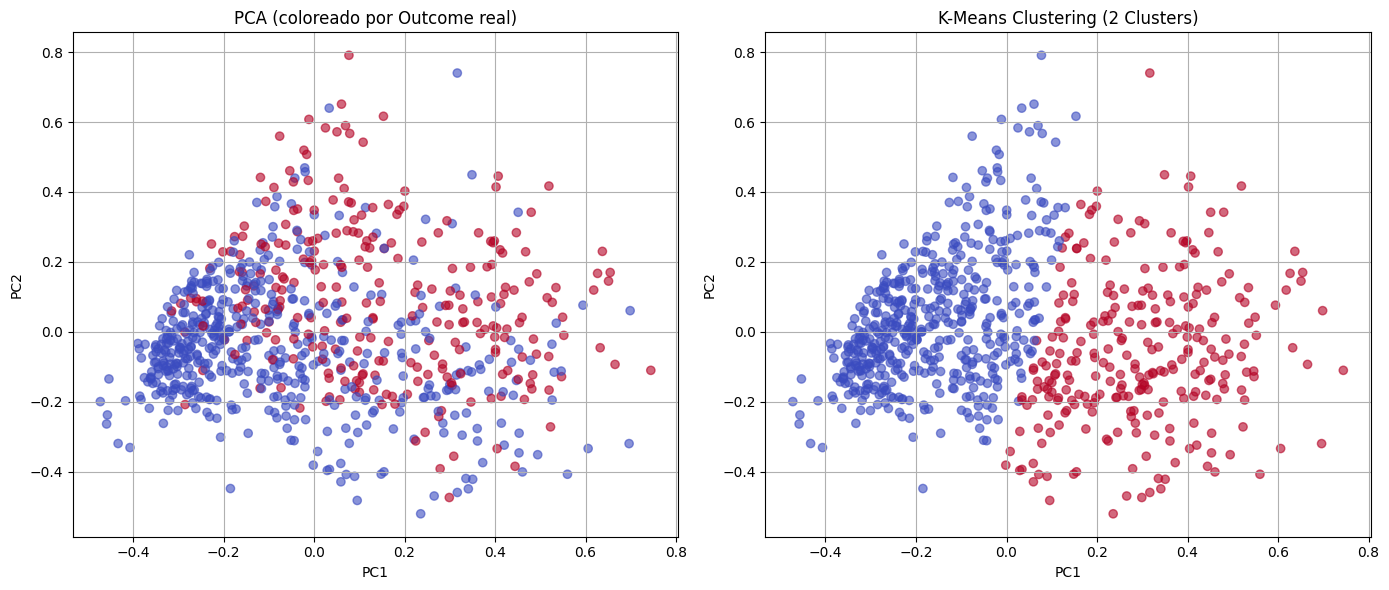

In [ ]:
#@title PCA
X = df_normalized.drop(columns=["Outcome"])

# PCA a 2 dimensiones para visualización
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

# Aplicar K-Means (2 clusters porque Outcome tiene 2 clases)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_pca2 = kmeans.fit_predict(X_pca2)

loadings = pd.DataFrame(
    pca2.components_.T,
    columns=[f"PC{i+1}" for i in range(pca2.n_components_)],
    index=df.drop(columns="Outcome").columns
)

print("Influencia segun cada caracteristica")
print("-----------------------------------------------")
print(loadings)
print("-----------------------------------------------")

true = df_normalized["Outcome"].values
pred = clusters_pca2.copy()

new_labels = np.zeros_like(pred)
for i in range(2):
    mask = pred == i
    new_labels[mask] = mode(true[mask], keepdims=True).mode[0]

acc_pca2=accuracy_score(true, new_labels)
prec_pca2=precision_score(true, new_labels)
rec_pca2=recall_score(true, new_labels)
f1_pca2=f1_score(true, new_labels)

print("Metricas segun Outcome")
print("\nAccuracy:", acc_pca2)
print("Precision:",prec_pca2)
print("Recall:",rec_pca2)
print("F1 score:",f1_pca2)
print("-----------------------------------------------")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_pca2[:, 0], X_pca2[:, 1], c=df["Outcome"], cmap="coolwarm", alpha=0.6)
axes[0].set_title("PCA (coloreado por Outcome real)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

axes[1].scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters_pca2, cmap="coolwarm", alpha=0.6)
axes[1].set_title("K-Means Clustering (2 Clusters)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

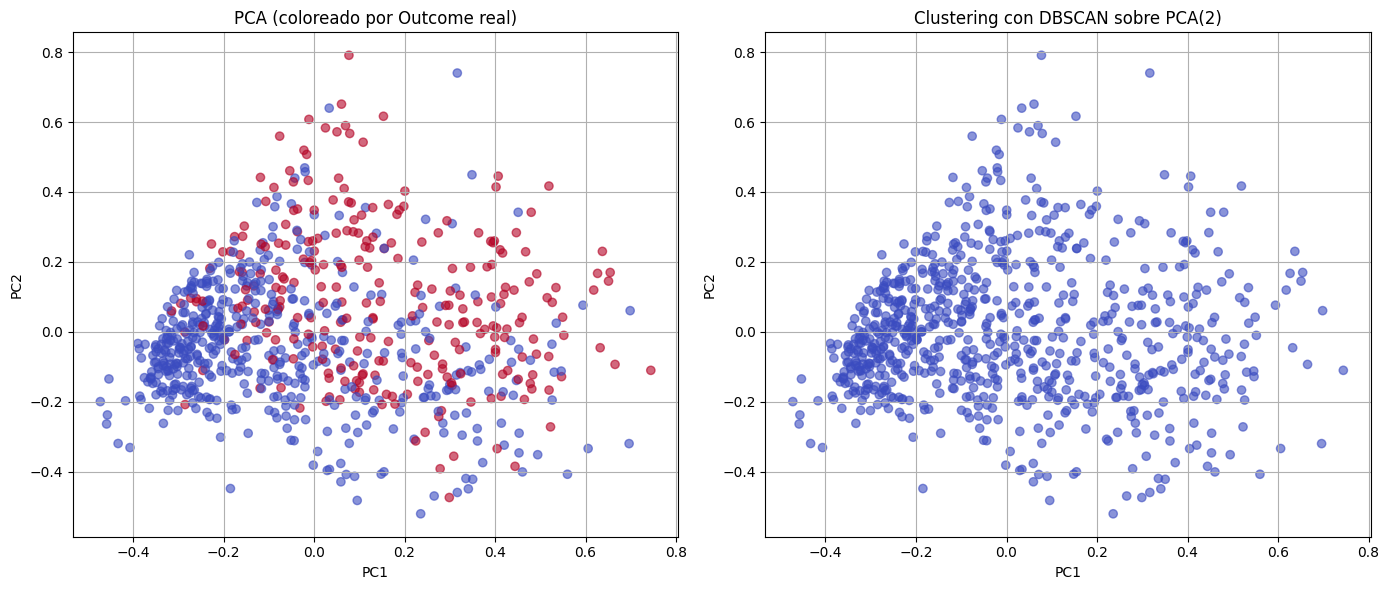

DBSCAN no encontró más de un cluster válido (o solo ruido).


In [ ]:
#@title PCA en DBSCAN
# DBSCAN sobre los componentes de PCA
dbscan = DBSCAN(eps=5)
clusters_dbscan = dbscan.fit_predict(X_pca2)

df["DBSCAN_Cluster"] = clusters_dbscan

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_pca2[:, 0], X_pca2[:, 1], c=df["Outcome"], cmap="coolwarm", alpha=0.6)
axes[0].set_title("PCA (coloreado por Outcome real)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

axes[1].scatter(X_pca2[:, 0], X_pca2[:, 1], c=clusters_dbscan, cmap="coolwarm", alpha=0.6)
axes[1].set_title("Clustering con DBSCAN sobre PCA(2)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

mask_valid = clusters_dbscan != -1
valid_clusters = clusters_dbscan[mask_valid]
valid_outcome = df["Outcome"][mask_valid]
valid_X = X_pca2[mask_valid]

if len(set(valid_clusters)) > 1 and len(valid_clusters) > 0:
    ari = adjusted_rand_score(valid_outcome, valid_clusters)
    silhouette = silhouette_score(valid_X, valid_clusters)

    print(f"ARI (DBSCAN vs Outcome): {ari:.4f}")
    print(f"Silhouette Score DBSCAN: {silhouette:.4f}")
    print(f"Puntos utilizados para evaluación: {len(valid_clusters)} de {len(clusters_dbscan)}")
else:
    print("DBSCAN no encontró más de un cluster válido (o solo ruido).")


Metricas segun Outcome

Accuracy: 0.6536458333333334
Precision: 0.5027027027027027
Recall: 0.6940298507462687
F1 score: 0.5830721003134797
-----------------------------------------------


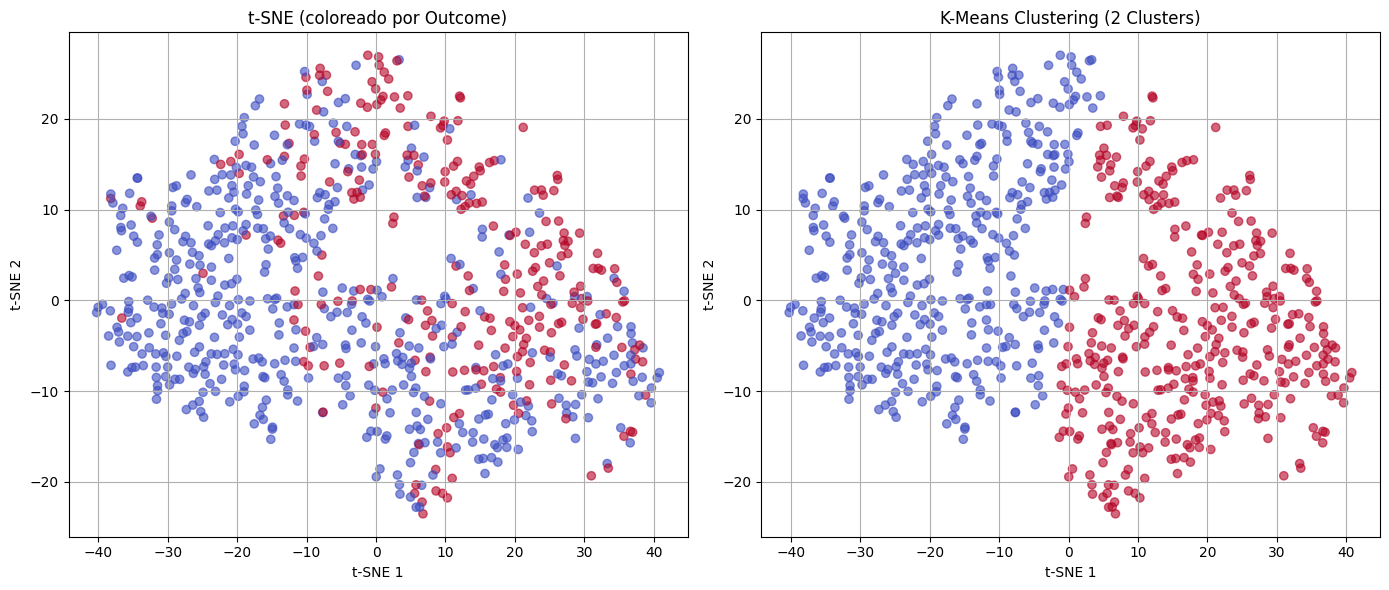

In [ ]:
#@title TSNE

# Aplicar t-SNE a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans.fit_predict(X_tsne)

true = df_normalized["Outcome"].values
pred = clusters_tsne.copy()

new_labels = np.zeros_like(pred)
for i in range(2):
    mask = pred == i
    new_labels[mask] = mode(true[mask], keepdims=True).mode[0]

acc_tsne=accuracy_score(true, new_labels)
prec_tsne=precision_score(true, new_labels)
rec_tsne=recall_score(true, new_labels)
f1_tsne=f1_score(true, new_labels)

print("Metricas segun Outcome")
print("\nAccuracy:", acc_tsne)
print("Precision:",prec_tsne)
print("Recall:",rec_tsne)
print("F1 score:",f1_tsne)
print("-----------------------------------------------")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["Outcome"], cmap="coolwarm", alpha=0.6)
axes[0].set_title("t-SNE (coloreado por Outcome)")
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")
axes[0].grid(True)

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne, cmap="coolwarm", alpha=0.6)
axes[1].set_title("K-Means Clustering (2 Clusters)")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
unique, counts = np.unique(clusters_dbscan, return_counts=True)
print("\nDistribución de etiquetas DBSCAN:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} puntos")


Distribución de etiquetas DBSCAN:
Cluster 0: 768 puntos


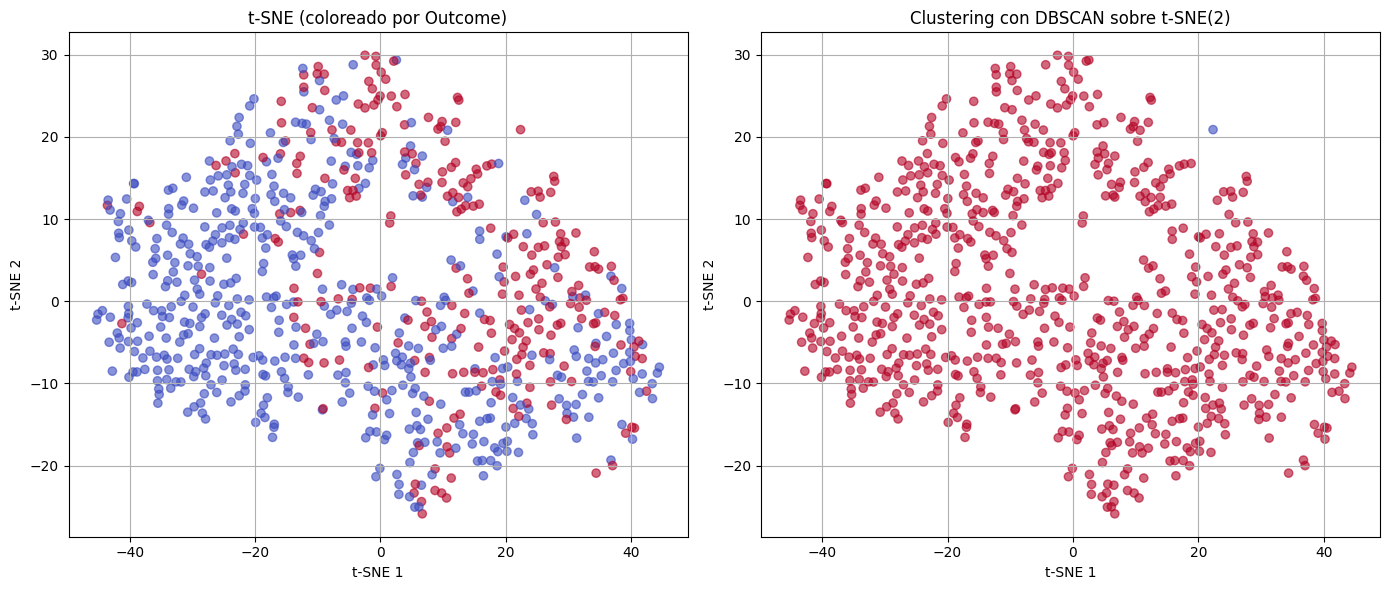

DBSCAN no encontró más de un cluster válido (o solo ruido).


In [ ]:
#@title TSNE en DBSCAN
dbscan = DBSCAN(eps=5)
clusters_dbscan = dbscan.fit_predict(X_tsne)

df["DBSCAN_Cluster"] = clusters_dbscan

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["Outcome"], cmap="coolwarm", alpha=0.6)
axes[0].set_title("t-SNE (coloreado por Outcome)")
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")
axes[0].grid(True)

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_dbscan, cmap="coolwarm", alpha=0.6)
axes[1].set_title("Clustering con DBSCAN sobre t-SNE(2)")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

mask_valid = clusters_dbscan != -1
valid_clusters = clusters_dbscan[mask_valid]
valid_outcome = df["Outcome"][mask_valid]
valid_X = X_pca2[mask_valid]

if len(set(valid_clusters)) > 1 and len(valid_clusters) > 0:
    ari = adjusted_rand_score(valid_outcome, valid_clusters)
    silhouette = silhouette_score(valid_X, valid_clusters)

    print(f"ARI (DBSCAN vs Outcome): {ari:.4f}")
    print(f"Silhouette Score DBSCAN: {silhouette:.4f}")
    print(f"Puntos utilizados para evaluación: {len(valid_clusters)} de {len(clusters_dbscan)}")
else:
    print("DBSCAN no encontró más de un cluster válido (o solo ruido).")

In [ ]:
#@title PCA en los modelos
X = df_normalized.drop(columns=["Outcome"])
y = df_normalized["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# -------------------------------------------
# Entrenamiento y evaluación de modelos
# -------------------------------------------

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))

# SVM
svm = SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)
print("\nSVM")
print(classification_report(y_test, y_pred_svm))

# Red Neuronal (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train_pca, y_train)
y_pred_mlp = mlp.predict(X_test_pca)
print("\nRed Neuronal (MLP)")
print(classification_report(y_test, y_pred_mlp))


Random Forest
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       151
           1       0.55      0.53      0.54        80

    accuracy                           0.69       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.69      0.69       231


SVM
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       151
           1       0.62      0.51      0.56        80

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.72       231


Red Neuronal (MLP)
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74 

In [ ]:
#@title Varianzas
X = df_normalized.drop(columns=['Outcome'])

varianzas = X.var()

print(varianzas.sort_values(ascending=False))


Pregnancies                 0.039287
Glucose                     0.038564
Age                         0.038418
DiabetesPedigreeFunction    0.020014
BMI                         0.019767
BloodPressure               0.015236
Insulin                     0.010780
SkinThickness               0.009131
dtype: float64
